In [ ]:
import os
import sys
from datetime import datetime
sys.path.insert(0, "../../..")
sys.path.insert(0, "../../../../acquire")

from HUGS.Processing import search
from HUGS.Client import Process, Search, Retrieve
from Acquire.ObjectStore import datetime_to_string
from Acquire.Client import User, Drive, Service, PAR, Authorisation, StorageCreds

from datetime import datetime
from cartopy.feature import BORDERS
import cartopy.crs as ccrs
import matplotlib.cm as cm
import xarray as xr
import numpy as np
import cartopy

import ipyleaflet as ipl
import ipywidgets as ipw
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from pathlib import Path

# Autoreload modules before executing code, useful during development
%load_ext autoreload
%autoreload 2

Search for CRDS data from the AGAGE network
Get some Bilsdale data, show on map?
Show emissions map

In [ ]:
base_url= "https://hugs.acquire-aaai.com/t"
search = Search(service_url=base_url)

search_terms = ["ch4"]
locations = []

results = search.search(search_terms=search_terms, locations=locations, data_type="CRDS")

results

{'bsd_ch4_108m': {'keys': ['data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2014-01-30-11:20:45+00:00_2014-12-31-23:31:56+00:00',
   'data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2014-03-01-00:40:09+00:00_2014-05-31-23:09:42+00:00',
   'data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2014-06-01-00:09:42+00:00_2014-08-31-23:17:01+00:00',
   'data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2014-09-01-00:17:02+00:00_2014-11-30-23:50:50+00:00',
   'data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2015-01-01-00:31:55+00:00_2015-02-28-23:01:56+00:00',
   'data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2015-03-01-00:01:57+00:00_2015-05-31-23:26:59+00:00',
   'data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2015-06-01-00:26:58+00:00_2015-08-31-23:22:51+00:00',
   'data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2015-09-01-00:22:53+00:00_2015-10-24-08:45:07+00:00',
   'data/uuid/f536df84-cf42-4b64-81a0-3fe874747f4b/v1/2016-01-19-17:20:02+00:00_2016-12-31-23:58:48+00:00',
   '

In [ ]:
retrieve = Retrieve(service_url=base_url)
# download_keys = results["bsd_ch4_108m"]["keys"]

# download_keys = {"bsd_ch4_108m": results["bsd_ch4_108m"]["keys"]}

download_keys = {key: results[key]["keys"] for key in results}

ch4_data = retrieve.retrieve(keys=download_keys)

In [ ]:
ch4_data.keys()

dict_keys(['bsd_ch4_108m', 'tac_ch4_100m'])

In [ ]:
bsd_ch4 = ch4_data["bsd_ch4_108m"]
tac_ch4 = ch4_data["tac_ch4_100m"]

In [ ]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0.5, 0.01, 'Figure 3. CH4 measurements from Bilsdale (BSD) and Tacolnestion (TAC) for 3 months in 2017')

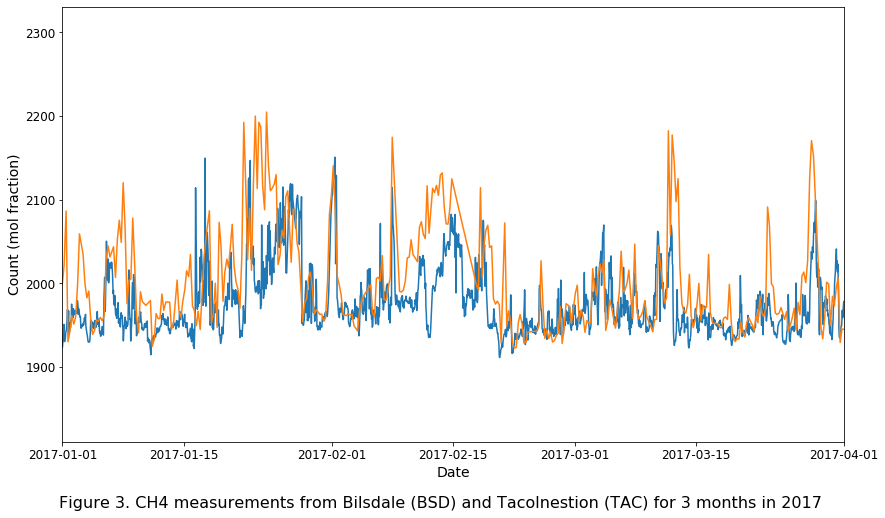

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(bsd_ch4.time, bsd_ch4.ch4_count)
ax.plot(tac_ch4.time, tac_ch4.ch4_count)
ax.set_xlabel("Date")
ax.set_ylabel("Count (mol fraction)")
ax.set_xlim(datetime(2017,1,1), datetime(2017,4,1))
txt = "Figure 3. CH4 measurements from Bilsdale (BSD) and Tacolnestion (TAC) for 3 months in 2017"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=16)


Worldwide CH4 emissions from the Emissions Database for Global Atmospheric Research (EDGAR)

In [ ]:
# filepath = "/home/gar/Documents/Devel/hugs/raw_data/ch4-anthro_GLOBAL_2012.nc"

# ds = xr.open_dataset(filepath)

# domain = "EUROPE"

# fp_name = "flux"
# lon_name = "lon"
# lat_name = "lat"

# long_values = ds["flux"][lon_name]
# lat_values = ds["flux"][lat_name]
# zero_values = ds["flux"][:, :, 0]

# fig = plt.figure(figsize=(14,10))
# # ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
# ax = fig.add_subplot(111, projection=ccrs.Mercator(), frameon=False)

# ax.coastlines()
# ax.add_feature(cartopy.feature.BORDERS,linewidth=0.5)
# # ax.add_feature(BORDERS, edgecolor="0.5")

# ax.set_extent((-40,75, 0,80),crs=ccrs.Mercator())

# cmap = cm.get_cmap("viridis")

# levels = np.linspace(np.percentile(ds[fp_name].values, 8), np.percentile(ds[fp_name].values, 97), 20)

# ax.contourf(long_values, lat_values, zero_values, cmap=cmap, levels=levels)

# plt.plot([-1.15], [54.358], color='red', linewidth=2, marker='o')